In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [3]:
train_df.describe()

,soldierId,shipId,attackId,assists,greekFireItems,healthLost,knockedOutSoldiers,throatSlits,healingPotionsUsed,killRank,killPoints,enemiesKilled,killingStreaks,farthermostKill,numShips,numSaves,horseRideDistance,horseRideKills,swimmingDistance,friendlyKills,castleTowerDestroys,onFootDistance,weaponsUsed,respectEarned,bestSoldierPerc
count,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06
mean,3.102678e+06,1.024777e+06,2.385539e+04,2.656320e-01,9.636856e-01,1.329033e+02,6.901455e-01,2.385866e-01,1.187169e+00,4.703440e+01,1.080898e+03,9.344958e-01,1.001849e+01,7.340537e+00,4.058035e+01,1.649345e-01,4.238835e+02,2.557985e-03,4.136261e+00,9.532814e+00,5.146264e-03,1.055122e+03,3.457289e+00,1.500504e+03,4.718663e-01
std,1.797477e+06,6.967197e+05,1.378227e+04,6.342160e-01,1.560643e+00,1.699439e+02,1.191514e+00,6.103033e-01,2.366389e+00,2.732772e+01,1.237119e+02,1.566192e+00,2.918988e+01,4.944640e+01,2.206667e+01,4.672004e-01,1.222927e+03,6.346679e-02,2.757015e+01,2.934563e+01,7.425362e-02,1.116122e+03,2.402109e+00,4.253571e+01,3.079147e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.550000e+02,0.000000e+00,0.000000e+00,-1.031000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+02,0.000000e+00
25%,1.537746e+06,4.741378e+05,1.191400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.334000e+02,2.000000e+00,1.491000e+03,1.979000e-01
50%,3.110606e+06,9.430320e+05,2.383700e+04,0.000000e+00,0.000000e+00,8.776000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,1.029000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.732000e+02,3.000000e+00,1.500000e+03,4.583000e-01
75%,4.657295e+06,1.418544e+06,3.580100e+04,0.000000e+00,1.000000e+00,1.884000e+02,1.000000e+00,0.000000e+00,1.000000e+00,7.000000e+01,1.126000e+03,1.000000e+00,1.000000e+00,4.551000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.808000e+03,5.000000e+00,1.510000e+03,7.407000e-01
max,6.224522e+06,2.700605e+06,4.773300e+04,2.000000e+01,1.800000e+01,6.384000e+03,6.300000e+01,2.600000e+01,5.900000e+01,1.000000e+02,2.047000e+03,6.000000e+01,1.000000e+02,1.323000e+03,1.000000e+02,4.100000e+01,4.839000e+04,4.200000e+01,5.286000e+03,1.000000e+02,5.000000e+00,1.730000e+04,7.600000e+01,1.923000e+03,1.000000e+00


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357336 entries, 0 to 4357335
Data columns (total 25 columns):
soldierId              float64
shipId                 float64
attackId               float64
assists                float64
greekFireItems         float64
healthLost             float64
knockedOutSoldiers     float64
throatSlits            float64
healingPotionsUsed     float64
killRank               float64
killPoints             float64
enemiesKilled          float64
killingStreaks         float64
farthermostKill        float64
numShips               float64
numSaves               float64
horseRideDistance      float64
horseRideKills         float64
swimmingDistance       float64
friendlyKills          float64
castleTowerDestroys    float64
onFootDistance         float64
weaponsUsed            float64
respectEarned          float64
bestSoldierPerc        float64
dtypes: float64(25)
memory usage: 831.1 MB


In [5]:
test_df.describe()

,Unnamed: 0,index,soldierId,shipId,attackId,assists,greekFireItems,healthLost,knockedOutSoldiers,throatSlits,healingPotionsUsed,killRank,killPoints,enemiesKilled,killingStreaks,farthermostKill,numShips,numSaves,horseRideDistance,horseRideKills,swimmingDistance,friendlyKills,castleTowerDestroys,onFootDistance,weaponsUsed,respectEarned
count,13716.000000,1.371600e+04,1.371600e+04,1.371600e+04,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000,13716.000000
mean,6857.500000,9.258044e+05,3.131012e+06,1.662540e+06,47809.099665,0.249708,0.942403,131.077332,0.679280,0.230971,1.120225,47.127515,1081.136045,0.921770,10.245626,6.966084,40.554608,0.163313,359.170248,0.003135,4.714463,9.568169,0.004958,1011.720692,3.355279,1500.643336
std,3959.612481,5.411667e+05,1.800944e+06,1.818650e+03,43.145745,0.603656,1.505719,163.665393,1.125587,0.579658,2.227472,27.416585,123.045542,1.502533,29.505979,48.031319,21.794369,0.461905,1143.102154,0.067703,28.937116,29.399734,0.071269,1078.710032,2.216528,38.870614
min,0.000000,0.000000e+00,4.773400e+04,1.659448e+06,47734.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,168.000000,0.000000,0.000000,-598.600000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,609.000000
25%,3428.750000,4.485478e+05,1.542307e+06,1.660926e+06,47772.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,1000.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,123.900000,2.000000,1491.000000
50%,6857.500000,9.319585e+05,3.152748e+06,1.662594e+06,47810.000000,0.000000,0.000000,85.345000,0.000000,0.000000,0.000000,47.000000,1029.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,540.050000,3.000000,1500.000000
75%,10286.250000,1.389403e+06,4.676845e+06,1.664034e+06,47846.000000,0.000000,1.000000,187.600000,1.000000,0.000000,1.000000,70.000000,1125.250000,1.000000,1.000000,4.586250,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1733.000000,5.000000,1510.000000
max,13715.000000,1.867190e+06,6.224526e+06,1.665866e+06,47883.000000,6.000000,11.000000,1688.000000,12.000000,7.000000,25.000000,100.000000,1873.000000,16.000000,100.000000,596.700000,98.000000,5.000000,26910.000000,4.000000,880.200000,100.000000,2.000000,9515.000000,23.000000,1803.000000


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13716 entries, 0 to 13715
Data columns (total 26 columns):
Unnamed: 0             13716 non-null int64
index                  13716 non-null int64
soldierId              13716 non-null float64
shipId                 13716 non-null float64
attackId               13716 non-null float64
assists                13716 non-null float64
greekFireItems         13716 non-null float64
healthLost             13716 non-null float64
knockedOutSoldiers     13716 non-null float64
throatSlits            13716 non-null float64
healingPotionsUsed     13716 non-null float64
killRank               13716 non-null float64
killPoints             13716 non-null float64
enemiesKilled          13716 non-null float64
killingStreaks         13716 non-null float64
farthermostKill        13716 non-null float64
numShips               13716 non-null float64
numSaves               13716 non-null float64
horseRideDistance      13716 non-null float64
horseRideKills       

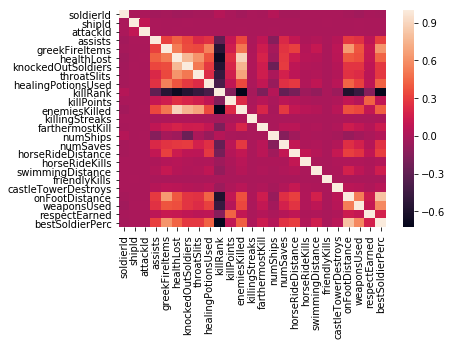

In [7]:
import seaborn as sns
corr = train_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [8]:
train=train_df.drop([ 'soldierId', 'shipId', 'attackId'],axis=1)
train.columns

Index(['assists', 'greekFireItems', 'healthLost', 'knockedOutSoldiers',
       'throatSlits', 'healingPotionsUsed', 'killRank', 'killPoints',
       'enemiesKilled', 'killingStreaks', 'farthermostKill', 'numShips',
       'numSaves', 'horseRideDistance', 'horseRideKills', 'swimmingDistance',
       'friendlyKills', 'castleTowerDestroys', 'onFootDistance', 'weaponsUsed',
       'respectEarned', 'bestSoldierPerc'],
      dtype='object')

In [9]:
test=test_df.drop([ 'soldierId', 'shipId', 'attackId'],axis=1)
test.columns

Index(['Unnamed: 0', 'index', 'assists', 'greekFireItems', 'healthLost',
       'knockedOutSoldiers', 'throatSlits', 'healingPotionsUsed', 'killRank',
       'killPoints', 'enemiesKilled', 'killingStreaks', 'farthermostKill',
       'numShips', 'numSaves', 'horseRideDistance', 'horseRideKills',
       'swimmingDistance', 'friendlyKills', 'castleTowerDestroys',
       'onFootDistance', 'weaponsUsed', 'respectEarned'],
      dtype='object')

In [10]:
test = test.drop(['Unnamed: 0'],axis=1)
test = test.drop(['index'],axis=1)

In [11]:
test.shape

(13716, 21)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


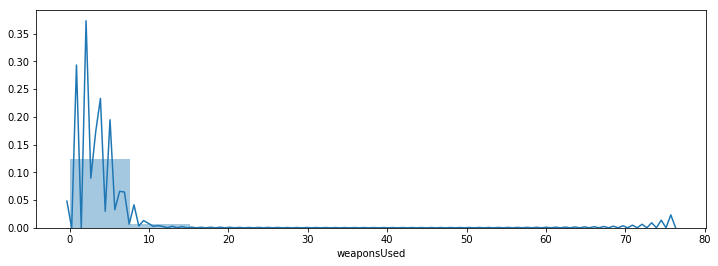

In [12]:
plt.figure(figsize=(12,4))
sns.distplot(train['weaponsUsed'], bins=10)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


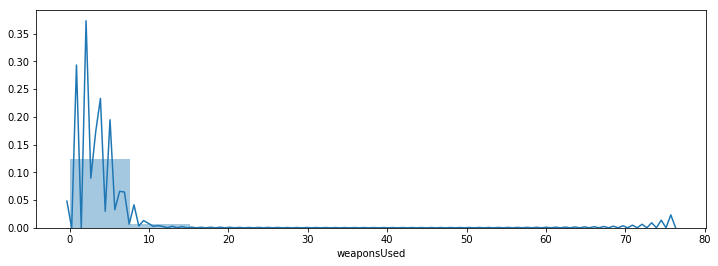

In [13]:
plt.figure(figsize=(12,4))
sns.distplot(train['weaponsUsed'], bins=10)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


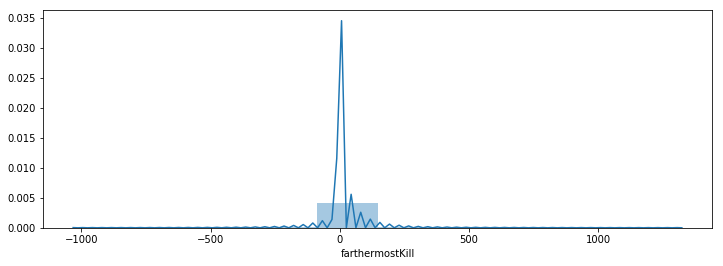

In [14]:
plt.figure(figsize=(12,4))
sns.distplot(train['farthermostKill'], bins=10)
plt.show()

In [15]:
test=test_df.drop([ 'weaponsUsed'],axis=1)

In [16]:
teat_df= test

In [17]:
train_df['helping_others'] = train_df['assists'] + train_df['numSaves']

In [18]:
test_df['helping_others'] = test_df['assists'] + test_df['numSaves']

In [19]:
train_df['totaldist']=train_df['onFootDistance']+train_df['swimmingDistance']+train_df['horseRideDistance']

In [20]:
test_df['totaldist']=test_df['onFootDistance']+test_df['swimmingDistance']+test_df['horseRideDistance']

In [21]:
train_df['throatslits_over_kills'] = train_df['throatSlits'] / train_df['killPoints']

In [22]:
test_df['throatslits_over_kills'] = test_df['throatSlits'] / test_df['killPoints']

In [23]:
train=train_df.drop([ 'farthermostKill'],axis=1)
train=train_df.drop([ 'farthermostKill'],axis=1)

In [24]:
test_df=test_df.drop([ 
         'assists',
       'killingStreaks',  'numSaves',
         'throatSlits'
       ],axis=1)

In [25]:
train_df=train_df.drop([ 
         'assists',
       'killingStreaks',  'numSaves',
         'throatSlits'
       ],axis=1)

In [26]:
train=train_df

In [27]:
test=test_df

In [28]:
y = train["bestSoldierPerc"]

In [29]:
X = train.drop("bestSoldierPerc", axis=1)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

In [31]:
from keras.models import Sequential
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
model1=Sequential()
model1.add(Dense(32, input_dim=x_train.shape[1], activation='relu' ))
model1.add(Dense(16, activation='relu' ))
model1.add(Dense(8, activation='relu' ))
model1.add(Dense(1,activation='linear'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [32]:
from keras import metrics
model1.compile(loss="mean_squared_error", optimizer='adam',metrics=[metrics.mae])

In [33]:
model1.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=100, batch_size=1024)

Instructions for updating:
Use tf.cast instead.
Train on 3485868 samples, validate on 871468 samples
Epoch 1/100
3485868/3485868 [==============================] - 17s 5us/step - loss: 22721178.0106 - mean_absolute_error: 818.1503 - val_loss: 36637.1770 - val_mean_absolute_error: 100.0573
Epoch 2/100
3485868/3485868 [==============================] - 14s 4us/step - loss: 81960.2441 - mean_absolute_error: 160.5594 - val_loss: 7121.3803 - val_mean_absolute_error: 66.9763
Epoch 3/100
3485868/3485868 [==============================] - 14s 4us/step - loss: 148469.0659 - mean_absolute_error: 205.3062 - val_loss: 2004.3483 - val_mean_absolute_error: 34.3649
Epoch 4/100
3485868/3485868 [==============================] - 14s 4us/step - loss: 129320.3332 - mean_absolute_error: 175.4365 - val_loss: 693.5510 - val_mean_absolute_error: 18.3036
Epoch 5/100
3485868/3485868 [==============================] - 14s 4us/step - loss: 110042.4553 - mean_absolute_error: 159.1572 - val_loss: 184701.2446 - val

In [34]:
preeetd = model1.predict(test)


ValueError: Error when checking input: expected dense_1_input to have shape (23,) but got array with shape (25,)

In [35]:
preeetd
pppp=preeetd.ravel()

NameError: name 'preeetd' is not defined

In [36]:
tes = pd.read_csv('../input/test.csv')
rrrr=tes["soldierId"]

In [37]:
vdvvv11 = pd.DataFrame(columns=['soldierId','bestSoldierPerc']) 
vdvvv11["bestSoldierPerc"]=pppp
vdvvv11["soldierId"]=rrrr
vdvvv11.to_csv("sub.csv",index=False)

NameError: name 'pppp' is not defined